In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [86]:
Car=pd.read_csv('data.csv')

## Tìm hiểu về dữ liệu

In [87]:
df=Car.copy()

In [88]:
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


Bạn hãy viết chương trình Python sử dụng thuật toán Naïve Bayes để phân lớp các một
hạng mục dữ liệu mới:

(Age: 25, Car: Sport) và (Age: 23, Car: SUV).

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [90]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.transpose().T

,Data Type,Column Real Name,IsNull,IsNa,Unique,Duplicate Values,Min,Max
ID,int64,ID,0,0,18924,313,20746880,45816654
Price,int64,Price,0,0,2315,313,1,26307500
Levy,object,Levy,0,0,559,313,-,997
Manufacturer,object,Manufacturer,0,0,65,313,ACURA,სხვა
Model,object,Model,0,0,1590,313,09-Mar,xD
Prod. year,int64,Prod. year,0,0,54,313,1939,2020
Category,object,Category,0,0,11,313,Cabriolet,Universal
Leather interior,object,Leather interior,0,0,2,313,No,Yes
Fuel type,object,Fuel type,0,0,7,313,CNG,Plug-in Hybrid
Engine volume,object,Engine volume,0,0,107,313,0,7.3


## Làm sạch dữ liệu

In [91]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

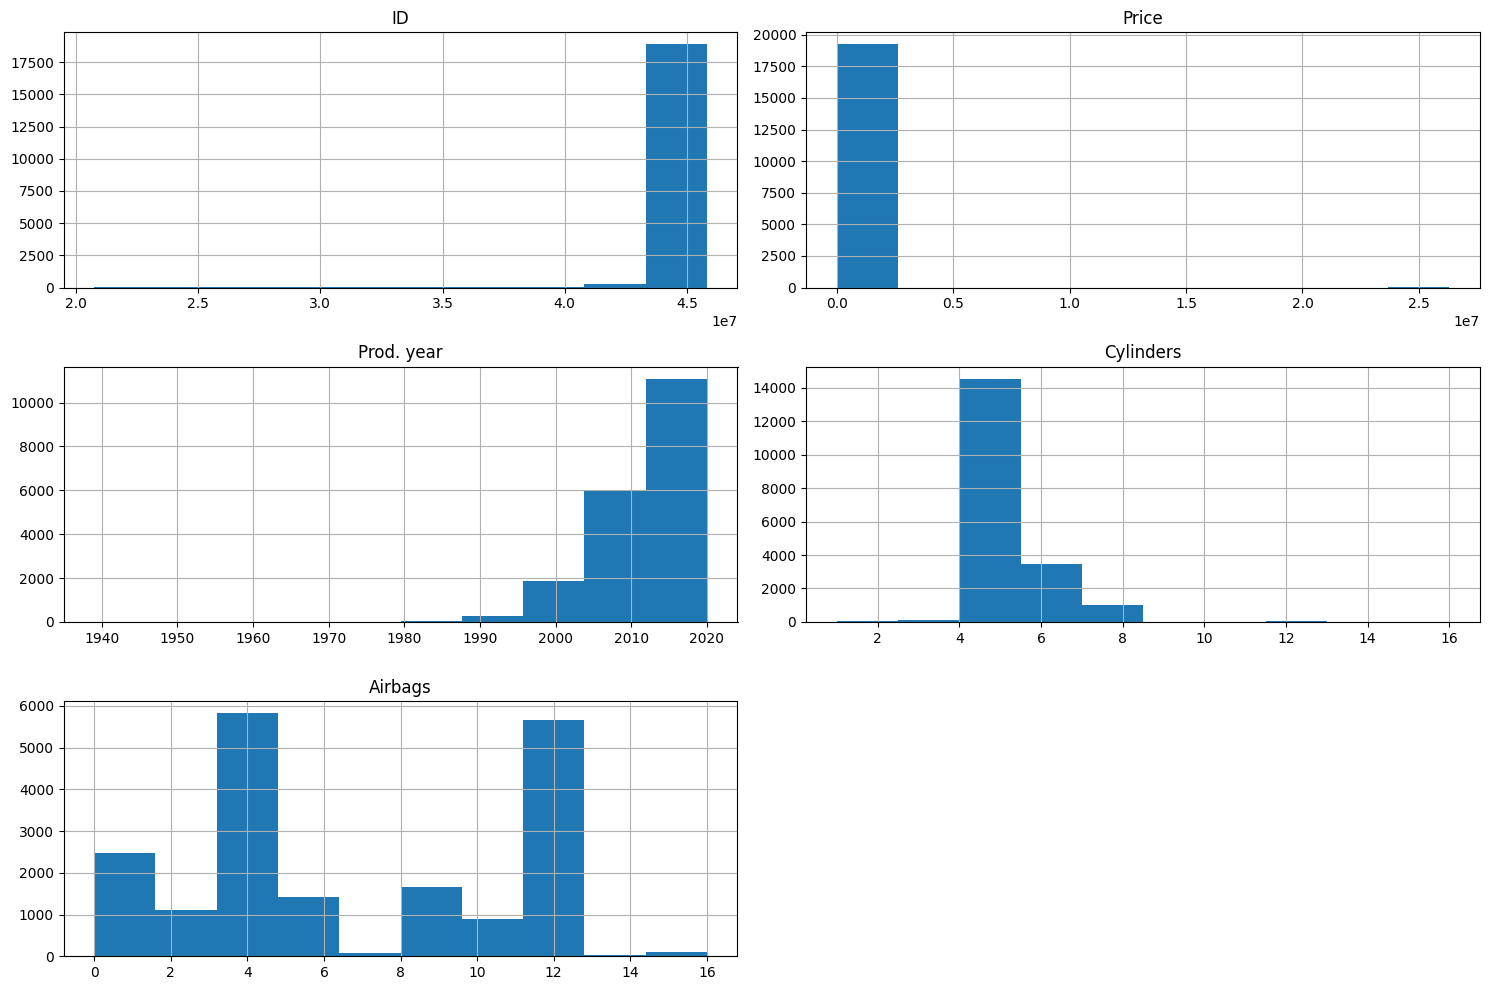

In [92]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [93]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [95]:
label_encoder_LV=LabelEncoder()
df['Levy']=label_encoder_LV.fit_transform(df['Levy'])

label_encoder_MF=LabelEncoder()
df['Manufacturer']=label_encoder_MF.fit_transform(df['Manufacturer'])

label_encoder_MD=LabelEncoder()
df['Model']=label_encoder_MD.fit_transform(df['Model'])

label_encoder_CG=LabelEncoder()
df['Category']=label_encoder_CG.fit_transform(df['Category'])

label_encoder_LT=LabelEncoder()
df['Leather interior']=label_encoder_LT.fit_transform(df['Leather interior'])

label_encoder_FT=LabelEncoder()
df['Fuel type']=label_encoder_FT.fit_transform(df['Fuel type'])

label_encoder_EV=LabelEncoder()
df['Engine volume']=label_encoder_EV.fit_transform(df['Engine volume'])

label_encoder_ML=LabelEncoder()
df['Mileage']=label_encoder_ML.fit_transform(df['Mileage'])

label_encoder_GB=LabelEncoder()
df['Gear box type']=label_encoder_GB.fit_transform(df['Gear box type'])

label_encoder_DW=LabelEncoder()
df['Drive wheels']=label_encoder_DW.fit_transform(df['Drive wheels']) 

label_encoder_D=LabelEncoder()
df['Doors']=label_encoder_D.fit_transform(df['Doors'])

label_encoder_W=LabelEncoder()
df['Wheel']=label_encoder_W.fit_transform(df['Wheel'])

label_encoder_CL=LabelEncoder()
df['Color']=label_encoder_CL.fit_transform(df['Color']) 

In [96]:
df.tail(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,0,36,385,1999,1,1,0,37,4394,4.0,1,2,0,0,12,5
19233,45778856,15681,504,23,1334,2011,9,1,5,44,2214,4.0,2,1,1,0,11,8
19234,45804997,26108,508,23,1442,2010,4,1,1,36,638,4.0,0,1,1,0,7,4
19235,45793526,5331,83,8,456,2007,4,1,1,36,5612,4.0,0,1,1,0,1,4
19236,45813273,470,480,23,1334,2012,9,1,2,44,2857,4.0,0,1,1,0,14,12


In [97]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,19237.0,2.358566e+02,217.603981,0.0,0.0,207.0,458.0,558.0
Manufacturer,19237.0,3.308068e+01,17.766465,0.0,21.0,32.0,54.0,64.0
Model,19237.0,8.625923e+02,410.812287,0.0,537.0,834.0,1226.0,1589.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Category,19237.0,6.265582e+00,2.790570,0.0,4.0,7.0,9.0,10.0
Leather interior,19237.0,7.253730e-01,0.446338,0.0,0.0,1.0,1.0,1.0
Fuel type,19237.0,3.432396e+00,1.807388,0.0,2.0,5.0,5.0,6.0
Engine volume,19237.0,4.146223e+01,15.315334,0.0,32.0,36.0,46.0,106.0


In [98]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.transpose().T

,Data Type,Column Real Name,IsNull,IsNa,Unique,Duplicate Values,Min,Max
ID,int64,ID,0,0,18924,313,20746880.0,45816654.0
Price,int64,Price,0,0,2315,313,1.0,26307500.0
Levy,int32,Levy,0,0,559,313,0.0,558.0
Manufacturer,int32,Manufacturer,0,0,65,313,0.0,64.0
Model,int32,Model,0,0,1590,313,0.0,1589.0
Prod. year,int64,Prod. year,0,0,54,313,1939.0,2020.0
Category,int32,Category,0,0,11,313,0.0,10.0
Leather interior,int32,Leather interior,0,0,2,313,0.0,1.0
Fuel type,int32,Fuel type,0,0,7,313,0.0,6.0
Engine volume,int32,Engine volume,0,0,107,313,0.0,106.0


In [99]:
df = df.drop_duplicates()

In [100]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,18924.0,4.557538e+07,937546.823889,20746880.0,45695007.50,45771914.5,45801742.25,45816654.0
Price,18924.0,1.858744e+04,192135.630726,1.0,5331.00,13172.0,22063.00,26307500.0
Levy,18924.0,2.366527e+02,217.640349,0.0,0.00,207.0,458.00,558.0
Manufacturer,18924.0,3.308735e+01,17.787356,0.0,21.00,32.0,54.00,64.0
Model,18924.0,8.622245e+02,410.990871,0.0,537.00,834.0,1226.00,1589.0
Prod. year,18924.0,2.010914e+03,5.665749,1939.0,2009.00,2012.0,2015.00,2020.0
Category,18924.0,6.266804e+00,2.791944,0.0,4.00,7.0,9.00,10.0
Leather interior,18924.0,7.255866e-01,0.446230,0.0,0.00,1.0,1.00,1.0
Fuel type,18924.0,3.426971e+00,1.806295,0.0,2.00,5.0,5.00,6.0
Engine volume,18924.0,4.142998e+01,15.303221,0.0,32.00,36.0,46.00,106.0


In [101]:
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.transpose().T

,Data Type,Column Real Name,IsNull,IsNa,Unique,Duplicate Values,Min,Max
ID,int64,ID,0,0,18924,0,20746880.0,45816654.0
Price,int64,Price,0,0,2315,0,1.0,26307500.0
Levy,int32,Levy,0,0,559,0,0.0,558.0
Manufacturer,int32,Manufacturer,0,0,65,0,0.0,64.0
Model,int32,Model,0,0,1590,0,0.0,1589.0
Prod. year,int64,Prod. year,0,0,54,0,1939.0,2020.0
Category,int32,Category,0,0,11,0,0.0,10.0
Leather interior,int32,Leather interior,0,0,2,0,0.0,1.0
Fuel type,int32,Fuel type,0,0,7,0,0.0,6.0
Engine volume,int32,Engine volume,0,0,107,0,0.0,106.0


In [102]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,44731507,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,45774419,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,45769185,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,45809263,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4


## Trực quan hóa dữ liệu

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Tính trung bình theo từng năm

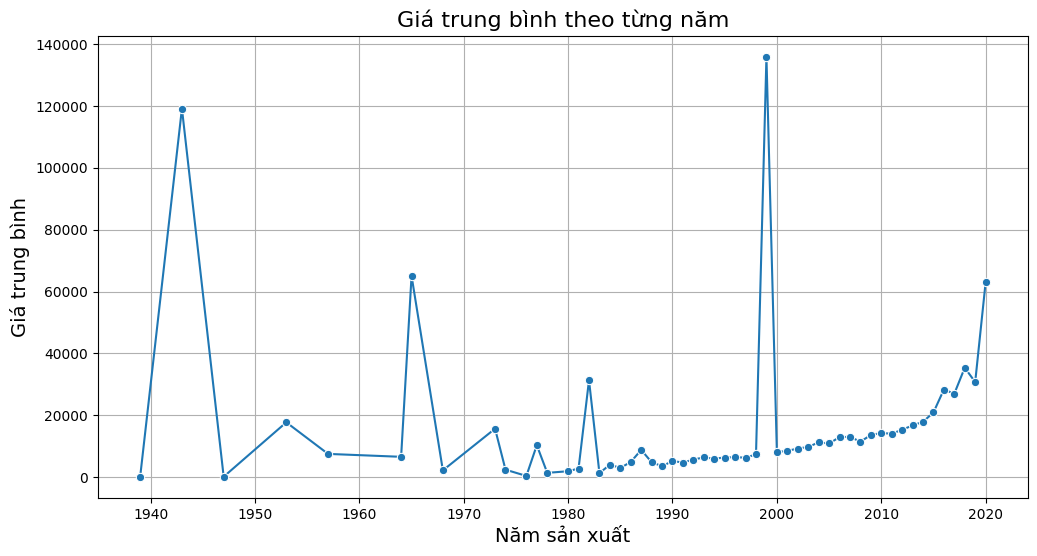

In [104]:
avg_price_by_year = df.groupby('Prod. year')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_year, x='Prod. year', y='Price', marker='o')
plt.title('Giá trung bình theo từng năm', fontsize=16)
plt.xlabel('Năm sản xuất', fontsize=14)
plt.ylabel('Giá trung bình', fontsize=14)
plt.grid()
plt.show()

2. Phân bố các hạng mục xe hơi

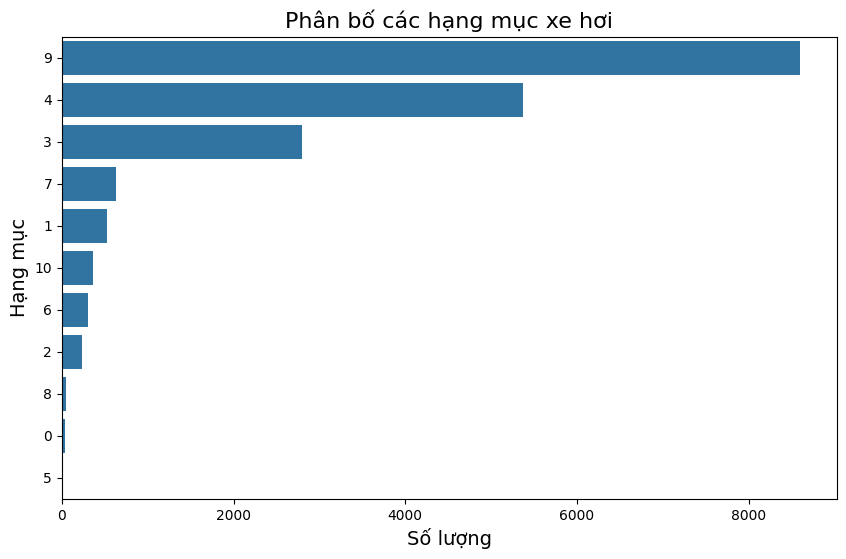

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Phân bố các hạng mục xe hơi', fontsize=16)
plt.xlabel('Số lượng', fontsize=14)
plt.ylabel('Hạng mục', fontsize=14)
plt.show()

3. Phân bố các loại hộp số

C:\Users\vanho\AppData\Local\Temp\ipykernel_27396\3585773919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gear box type', order=df['Gear box type'].value_counts().index, palette='Set2')


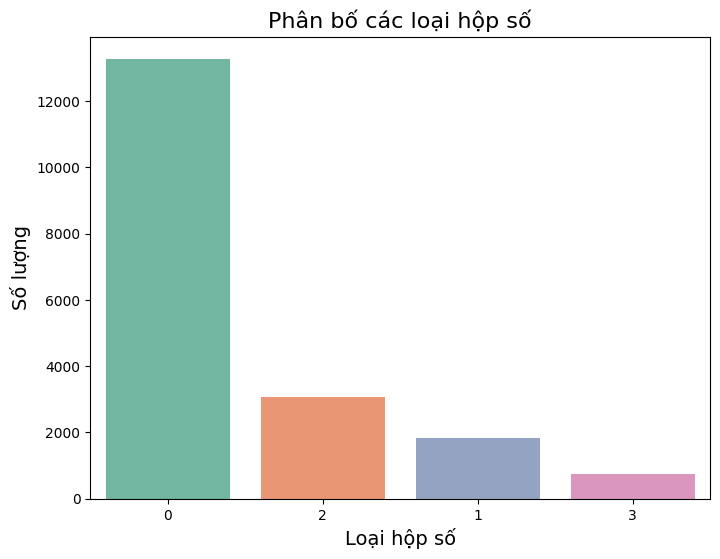

In [106]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gear box type', order=df['Gear box type'].value_counts().index, palette='Set2')
plt.title('Phân bố các loại hộp số', fontsize=16)
plt.xlabel('Loại hộp số', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.show()

4. Phân bố nội thất da


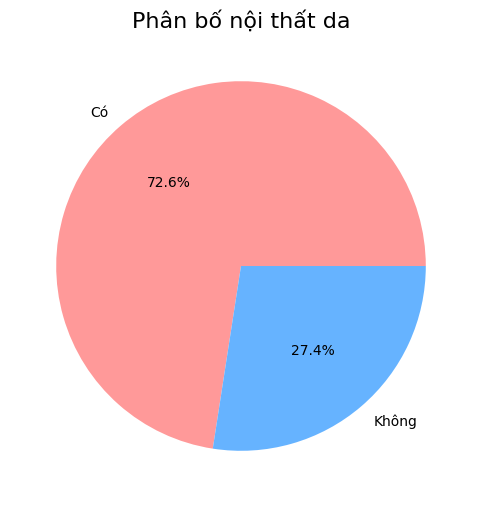

In [107]:
plt.figure(figsize=(6, 6))
df['Leather interior'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Có', 'Không'], colors=['#ff9999','#66b3ff'])
plt.title('Phân bố nội thất da', fontsize=16)
plt.ylabel('')
plt.show()

5. Phân bố các phương tiện theo loại nhiên liệu và hạng mục

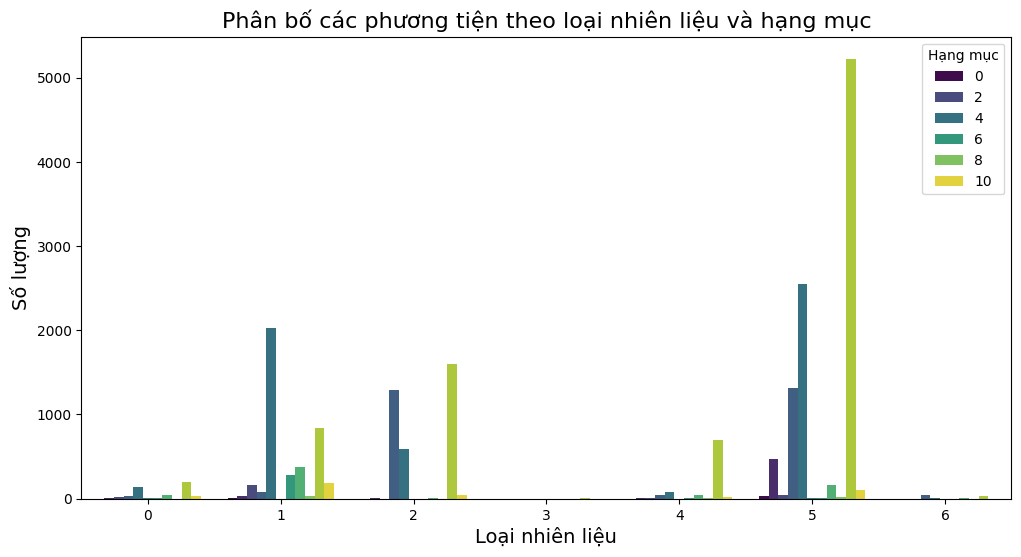

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fuel type', hue='Category', palette='viridis')
plt.title('Phân bố các phương tiện theo loại nhiên liệu và hạng mục', fontsize=16)
plt.xlabel('Loại nhiên liệu', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.legend(title='Hạng mục')
plt.show()

6. Giá của 5 nhà sản xuất hàng đầu

C:\Users\vanho\AppData\Local\Temp\ipykernel_27396\3260253159.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_top_5, x='Manufacturer', y='Price', palette='coolwarm')


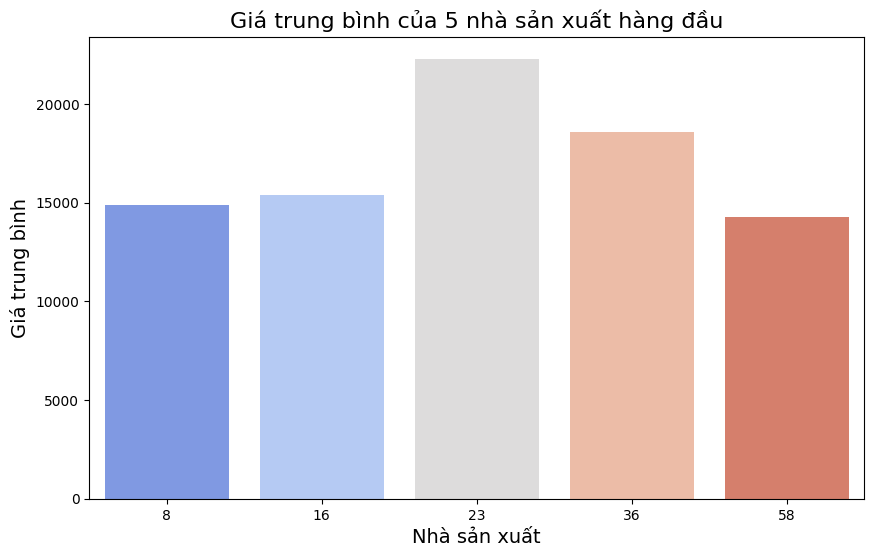

In [109]:
top_5_manufacturers = df['Manufacturer'].value_counts().head(5).index

# Lọc dữ liệu cho 5 nhà sản xuất này và tính giá trung bình
avg_price_top_5 = df[df['Manufacturer'].isin(top_5_manufacturers)].groupby('Manufacturer')['Price'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_top_5, x='Manufacturer', y='Price', palette='coolwarm')
plt.title('Giá trung bình của 5 nhà sản xuất hàng đầu', fontsize=16)
plt.xlabel('Nhà sản xuất', fontsize=14)
plt.ylabel('Giá trung bình', fontsize=14)
plt.show()

In [110]:
count_target=df['Price'].value_counts()
print(count_target)

Price
15681    274
470      264
392      237
14113    236
10976    233
        ... 
54954      1
62493      1
14122      1
46490      1
22075      1
Name: count, Length: 2315, dtype: int64


## Kiểm tra ngoại lai

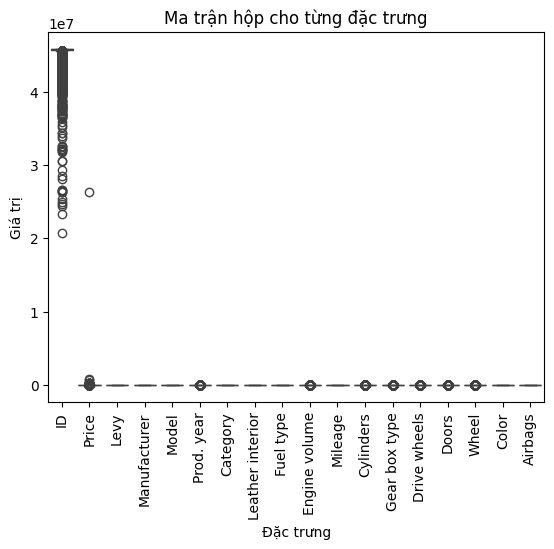

In [111]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=df)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

In [112]:

def handle_outliers_iqr(df, columns):
    """
    Xử lý outliers bằng phương pháp IQR.
    Thay giá trị ngoại lai bằng giới hạn gần nhất (clipping).
    
    Parameters:
    - df: DataFrame chứa dữ liệu
    - columns: Danh sách các cột cần xử lý outliers
    
    Returns:
    - DataFrame sau khi xử lý
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Tính Q1 (quartile 1)
        Q3 = df[col].quantile(0.75)  # Tính Q3 (quartile 3)
        IQR = Q3 - Q1                # Tính IQR
        lower_bound = Q1 - 1.5 * IQR # Giới hạn dưới
        upper_bound = Q3 + 1.5 * IQR # Giới hạn trên
        
        # Clipping các giá trị ngoài khoảng
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

columns_to_process = ['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']
df_cleaned = handle_outliers_iqr(df, columns_to_process)

# Hiển thị DataFrame sau khi xử lý
df_cleaned

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,4.565440e+07,13328.0,114.0,32.0,1242.0,2010.0,4.0,1.0,2.0,63.0,2838.0,4.0,0.0,1.0,1.0,0.0,12.0,12.0
1,4.553491e+07,16621.0,4.0,8.0,658.0,2011.0,4.0,0.0,5.0,56.0,2960.0,4.0,2.0,1.0,1.0,0.0,1.0,8.0
2,4.577442e+07,8467.0,0.0,21.0,684.0,2006.0,3.0,0.0,5.0,22.0,3140.0,4.0,2.5,1.0,1.0,0.0,1.0,2.0
3,4.576918e+07,3607.0,512.0,16.0,661.0,2011.0,4.0,1.0,2.0,46.0,2413.0,4.0,0.0,1.0,1.0,0.0,14.0,0.0
4,4.580926e+07,11726.0,366.0,21.0,684.0,2014.0,3.0,1.0,5.0,22.0,7396.0,4.0,0.0,1.0,1.0,0.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,4.579836e+07,8467.0,0.0,36.0,385.0,2000.0,1.0,1.0,0.0,37.0,4394.0,4.0,1.0,1.0,1.0,0.0,12.0,5.0
19233,4.577886e+07,15681.0,504.0,23.0,1334.0,2011.0,9.0,1.0,5.0,44.0,2214.0,4.0,2.0,1.0,1.0,0.0,11.0,8.0
19234,4.580500e+07,26108.0,508.0,23.0,1442.0,2010.0,4.0,1.0,1.0,36.0,638.0,4.0,0.0,1.0,1.0,0.0,7.0,4.0
19235,4.579353e+07,5331.0,83.0,8.0,456.0,2007.0,4.0,1.0,1.0,36.0,5612.0,4.0,0.0,1.0,1.0,0.0,1.0,4.0


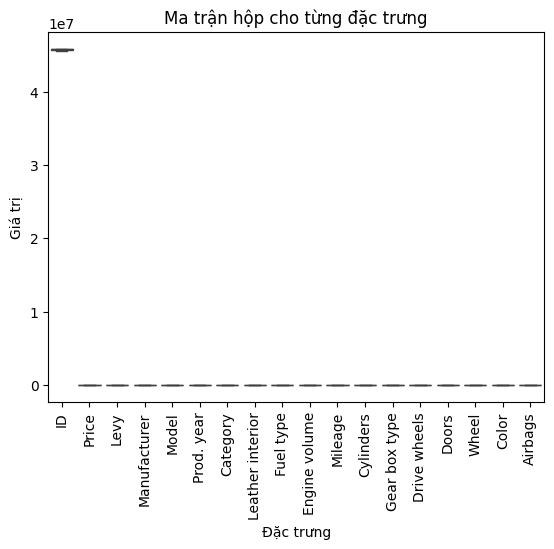

In [113]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=df)

#Thêm tiêu đề và nhãn
plt.title("Ma trận hộp cho từng đặc trưng") 
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)
plt.show()

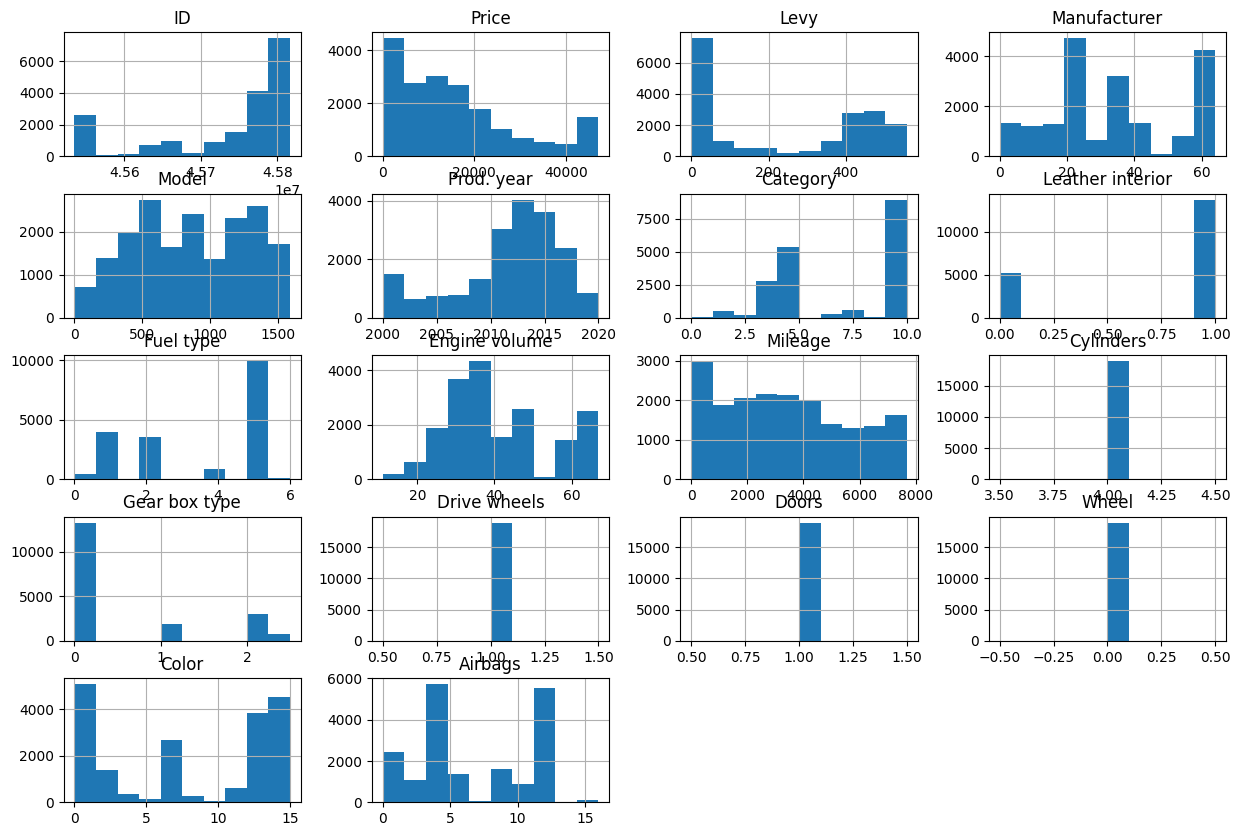

In [114]:
df.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

## Xây dựng mô hình

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV

In [116]:
X = df_cleaned[[ 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']].values
y = df_cleaned['Price'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [118]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13625, 16)
y_train shape: (13625,)
X_test shape: (3785, 16)
y_test shape: (3785,)


Chọn đặc trưng quan trọng

In [119]:
selector = SelectKBest(score_func=f_regression, k='all') # Change the scoring function to f_classif
selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x0000022E82A559E0>)

In [120]:
scores = selector.scores_  
# Lưu trữ điểm số (scores) của từng đặc trưng, thường được tính dựa trên một phép thử thống kê 
# (ví dụ: F-test, Chi-square). Điểm cao cho thấy đặc trưng đó có khả năng phân biệt cao.

p_values = selector.pvalues_  
# Lưu trữ giá trị p-value tương ứng với từng đặc trưng. 
# Giá trị này dùng để kiểm tra mức độ ý nghĩa thống kê. 
# Thường các đặc trưng có p-value nhỏ hơn ngưỡng (ví dụ: 0.05) sẽ được xem là quan trọng.

selected_mask = selector.get_support()  
# Tạo một mảng Boolean cho biết đặc trưng nào được chọn. 
# Giá trị True có nghĩa là đặc trưng đó đã được giữ lại sau khi chọn.

selected_indices = selector.get_support(indices=True)  
# Trả về chỉ số của các đặc trưng được chọn trong tập dữ liệu ban đầu. 
# Ví dụ: nếu các đặc trưng thứ 1, 3, 5 được chọn, kết quả sẽ là [1, 3, 5].

feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Scores of all features:\n", scores)
print("P-values of all features:\n", p_values)
print("Mask of selected features:\n", selected_mask)
print("Indices of selected features:\n", selected_indices)
print("Names of selected features:\n", selected_feature_names)

Scores of all features:
 [  20.44487216   82.56504233  103.50524726 1712.78373545  129.19640324
  228.14499241   59.67937265  127.56181813  242.83255387    0.
  259.30429407    0.            0.            0.            2.95653705
   43.40042163]
P-values of all features:
 [6.18914707e-06 1.16165755e-19 3.17008641e-24 0.00000000e+00
 8.36780208e-30 3.92422232e-51 1.19417297e-14 1.89208629e-29
 2.78855783e-54 1.00000000e+00 8.30673952e-58 1.00000000e+00
 1.00000000e+00 1.00000000e+00 8.55536582e-02 4.62475400e-11]
Mask of selected features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Indices of selected features:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Names of selected features:
 ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16']


Chuẩn hóa dữ liệu

In [121]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

In [122]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,4.565440e+07,13328.0,114.0,32.0,1242.0,2010.0,4.0,1.0,2.0,63.0,2838.0,4.0,0.0,1.0,1.0,0.0,12.0,12.0
1,4.553491e+07,16621.0,4.0,8.0,658.0,2011.0,4.0,0.0,5.0,56.0,2960.0,4.0,2.0,1.0,1.0,0.0,1.0,8.0
2,4.577442e+07,8467.0,0.0,21.0,684.0,2006.0,3.0,0.0,5.0,22.0,3140.0,4.0,2.5,1.0,1.0,0.0,1.0,2.0
3,4.576918e+07,3607.0,512.0,16.0,661.0,2011.0,4.0,1.0,2.0,46.0,2413.0,4.0,0.0,1.0,1.0,0.0,14.0,0.0
4,4.580926e+07,11726.0,366.0,21.0,684.0,2014.0,3.0,1.0,5.0,22.0,7396.0,4.0,0.0,1.0,1.0,0.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,4.579836e+07,8467.0,0.0,36.0,385.0,2000.0,1.0,1.0,0.0,37.0,4394.0,4.0,1.0,1.0,1.0,0.0,12.0,5.0
19233,4.577886e+07,15681.0,504.0,23.0,1334.0,2011.0,9.0,1.0,5.0,44.0,2214.0,4.0,2.0,1.0,1.0,0.0,11.0,8.0
19234,4.580500e+07,26108.0,508.0,23.0,1442.0,2010.0,4.0,1.0,1.0,36.0,638.0,4.0,0.0,1.0,1.0,0.0,7.0,4.0
19235,4.579353e+07,5331.0,83.0,8.0,456.0,2007.0,4.0,1.0,1.0,36.0,5612.0,4.0,0.0,1.0,1.0,0.0,1.0,4.0


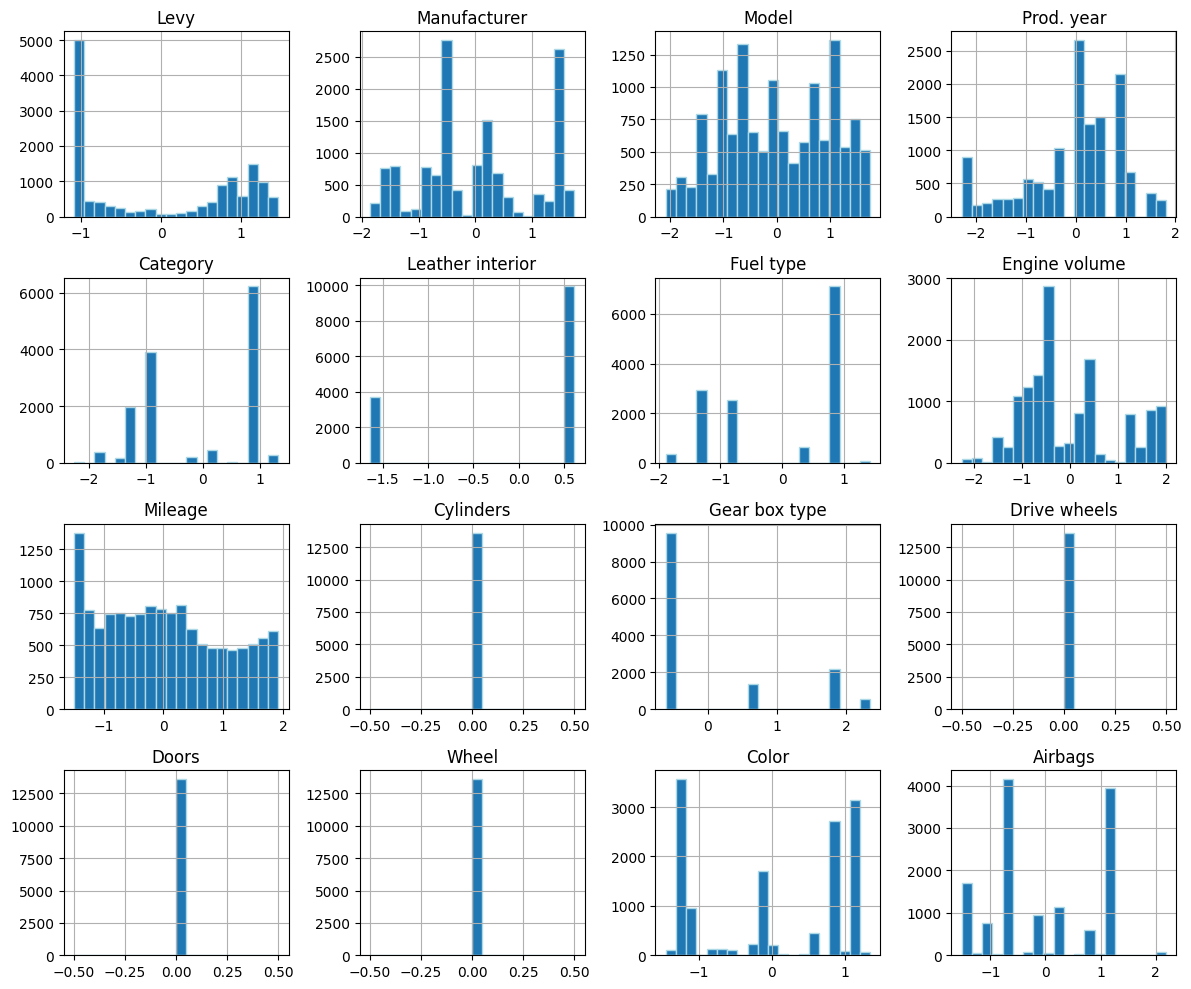

In [123]:
# Phân bố dữ liệu sau khi chuẩn hóa
X_df = pd.DataFrame(X_train_scaled, columns=[ 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'])
X_df.hist(figsize=(12, 10), bins=20, edgecolor='lightblue')

plt.tight_layout()
plt.show()

In [124]:
from collections import Counter 
print(Counter(y))

Counter({47161.0: 1055, 15681.0: 274, 470.0: 264, 392.0: 237, 14113.0: 236, 10976.0: 233, 314.0: 232, 12544.0: 221, 7840.0: 220, 17249.0: 213, 18817.0: 213, 9408.0: 198, 627.0: 190, 10036.0: 178, 549.0: 173, 20385.0: 173, 706.0: 166, 10349.0: 163, 13172.0: 155, 23521.0: 152, 11604.0: 149, 7213.0: 147, 6272.0: 147, 11917.0: 145, 16621.0: 141, 8467.0: 138, 16308.0: 136, 8154.0: 130, 941.0: 127, 8781.0: 126, 13485.0: 124, 15053.0: 122, 21953.0: 121, 5018.0: 120, 862.0: 119, 17876.0: 118, 9722.0: 116, 11290.0: 116, 6899.0: 110, 3763.0: 110, 6586.0: 106, 157.0: 106, 18189.0: 105, 19444.0: 100, 25089.0: 100, 188.0: 100, 784.0: 99, 7527.0: 97, 5645.0: 93, 12231.0: 92, 282.0: 90, 4704.0: 89, 18503.0: 89, 22580.0: 87, 29793.0: 86, 1019.0: 83, 14740.0: 82, 4077.0: 81, 3136.0: 80, 3293.0: 80, 10663.0: 78, 15367.0: 78, 26657.0: 77, 17562.0: 77, 30.0: 77, 5331.0: 77, 14426.0: 77, 21326.0: 76, 12858.0: 76, 3450.0: 74, 19757.0: 74, 16935.0: 73, 9095.0: 72, 21012.0: 72, 220.0: 71, 4861.0: 71, 13799.0: